### Adult income 

<b>Title : </b>adult

<b>Number of Attributes : </b>6 continuous, 8 nominal attributes.

<b>Attribute Information:<b>
    
| **Column**  | **Type** | **Description** |
| :---: | :---: | :---: |
|age| continuous|Age of the person|
|workclass| categorical|Class of work|
|fnlwgt| continuous|Final weight of how much of the population it represents|
|education| categorical|Education level|
|education-num| continuous|Numeric education level|
|marital-status| categorical|Marital status  of the person|
|occupation|categorical|Occupation  of the person|
|relationship|categorical|Type of relationship|
|race| Categorical|Race  of the person|
|gender| Categorical|gender of the person|
|capital-gain| continuous|Capital gains obteined|
|capital-loss| continuous|Capital loss|
|hours-per-week| continuous|Average number of hour working per week|
|native-country| categorical|Country of origin|
|income|  categorical|Income level|
    


<b>Objective:</b>  Prediction task is to determine whether a person makes over 50K a year

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
df= pd.read_csv('adult.csv')

In [9]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
df.shape

(48842, 15)

In [11]:
# we can see in the dataset there are few '?'
df.replace('?', np.NaN,inplace=True)

In [12]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [14]:
df_missing = df.isna()
df_num_missing = df_missing.sum()

In [15]:
print(df_num_missing/len(df))

age                0.000000
workclass          0.057307
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         0.057512
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.017546
income             0.000000
dtype: float64


Here we can see how percentage of the missing values are present. As the missing values are of very less percentage highest being 0.057, i.e 5% let us replace it with mode as those are categorical data

In [16]:
missing = ['workclass','occupation','native-country']
for i in missing:
    mode = df[i].mode()[0]
    print(mode)
    df[i].fillna(mode, inplace=True)

Private
Prof-specialty
United-States


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [18]:
num_cols = []
cat_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [19]:
print("Numerical Columns in dataset: ",num_cols)
print("Categorical Columns in dataset: ",cat_cols)

Numerical Columns in dataset:  ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Columns in dataset:  ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


### Univariant analysis

Let us see the distribution plot for age column

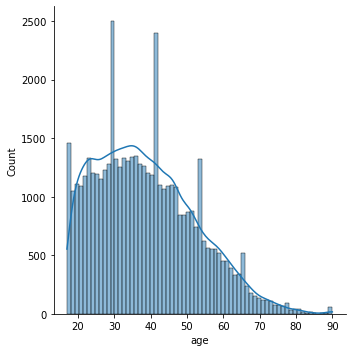

In [20]:
import seaborn as sns
sns.displot(x=df['age'],kde=True)

<AxesSubplot:xlabel='age'>

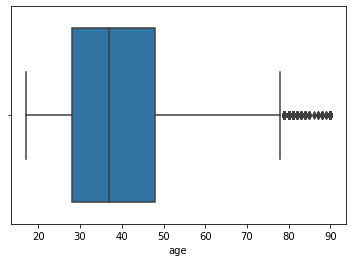

In [21]:
sns.boxplot(x=df['age'])

In [22]:
print("Median: ", df['age'].median())
print("Mean: ",df['age'].mean())
print("Min: ",df['age'].min())
print("Max: ",df['age'].max())

Median:  37.0
Mean:  38.64358543876172
Min:  17
Max:  90


From above we can see there are some outliers and also the distribution looks like log normal. So, let us handle this later.



Let us check the fnlwgt column

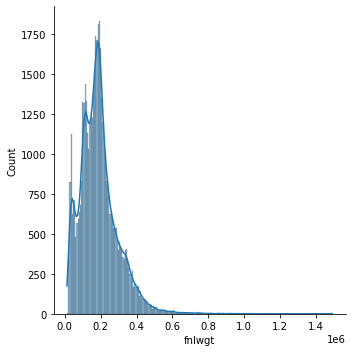

In [23]:
sns.displot(x=df['fnlwgt'],kde=True)

<AxesSubplot:xlabel='fnlwgt'>

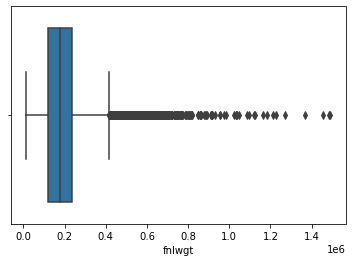

In [24]:
sns.boxplot(x=df['fnlwgt'])

Here as well, we have a lot of outliers in the column. 

 Similarly let us check for educational-num, capital-gain, capital-loss, hours-per-week

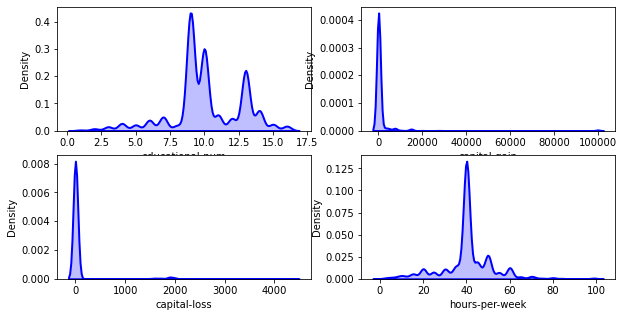

In [28]:
fig, ax = plt.subplots(2, 2)
sns.distplot(df['educational-num'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "educational-num", color ="blue", ax = ax[0][0])
sns.distplot(df['capital-gain'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "capital-gain", color ="blue", ax = ax[0][1])
sns.distplot(df['capital-loss'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "capital-loss", color ="blue", ax = ax[1][0])
sns.distplot(df['hours-per-week'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "hours-per-week", color ="blue", ax = ax[1][1])
fig.set_figheight(5)
fig.set_figwidth(10)


Also, Let us look at the box plot

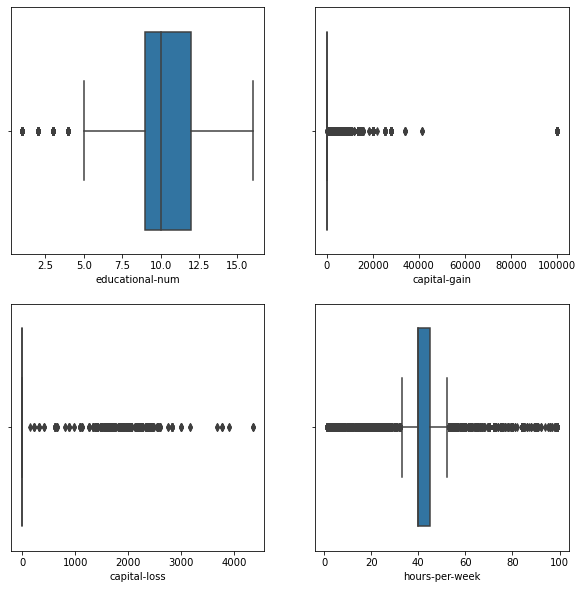

In [29]:
fig, ax = plt.subplots(2, 2)
sns.boxplot(x=df['educational-num'], ax = ax[0][0])
sns.boxplot(x=df['capital-gain'], ax = ax[0][1])
sns.boxplot(x=df['capital-loss'],  ax = ax[1][0])
sns.boxplot(x=df['hours-per-week'], ax = ax[1][1])
fig.set_figheight(10)
fig.set_figwidth(10)

In [30]:
print("Unique values in capital-gain",len(df['capital-gain'].unique()))

Unique values in capital-gain 123


In [31]:
print("Unique values in capital-loss",len(df['capital-loss'].unique()))

Unique values in capital-loss 99


In [32]:
print("Unique values in hours-per-week",len(df['hours-per-week'].unique()))

Unique values in hours-per-week 96


Though these columns are continuous these have some unique values. So, let us not remove the outliers(may not be outliers)


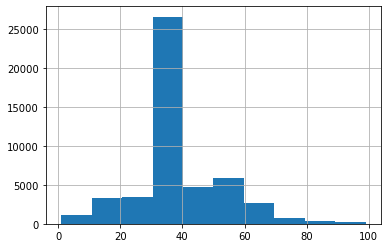

In [33]:
df['hours-per-week'].hist()
plt.show()

From the above graph, we can see 30-40 hours per week is most common. There are also people who work for 80-100 and also less than 20 which is unusual

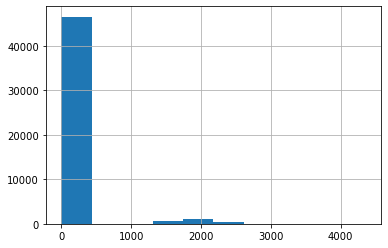

In [34]:
df['capital-loss'].hist()
plt.show()

The above graph shows if the person has loss or not

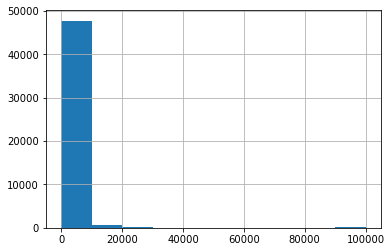

In [35]:
df['capital-gain'].hist()
plt.show()

The above graph shows if the person has gain or not 

<AxesSubplot:xlabel='workclass', ylabel='count'>

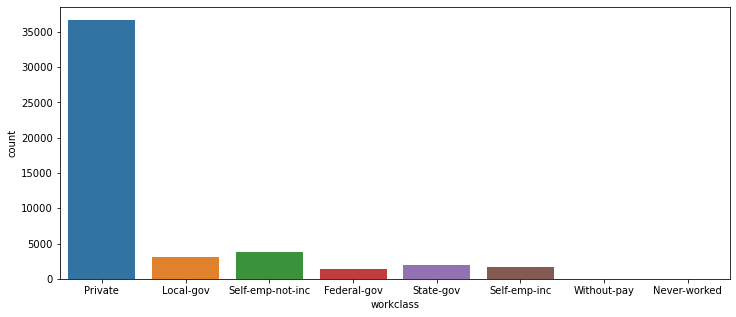

In [36]:
plt.figure(figsize=(12,5))
sns.countplot(df['workclass'])


It is clear that most of the people are from Private sector

<AxesSubplot:xlabel='education', ylabel='count'>

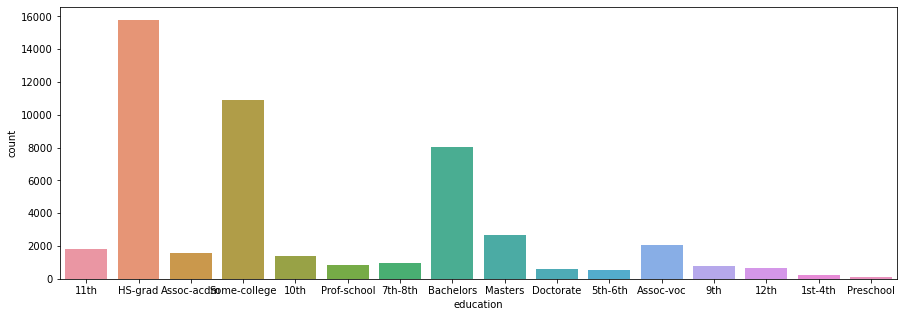

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(df['education'])


More number of people are from HS-grad,Some-college and Bachelors

<AxesSubplot:xlabel='marital-status', ylabel='count'>

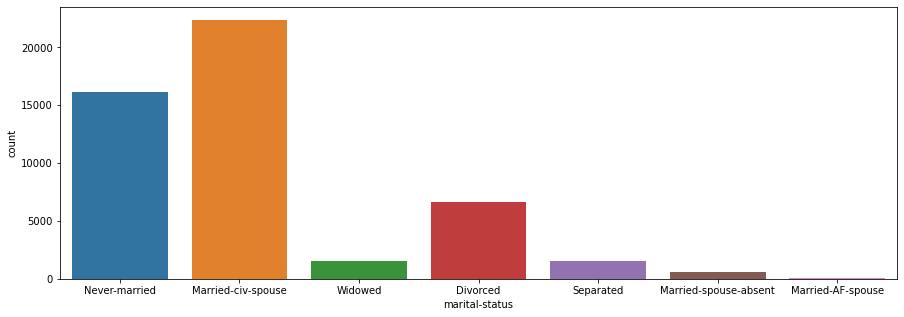

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(df['marital-status'])


Married-civ-spouse has maximum number of observations. Married-AF-spouse has minimum number of observations.

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Prof-specialty'
 'Other-service' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handlers-cleaners' 'Armed-Forces']


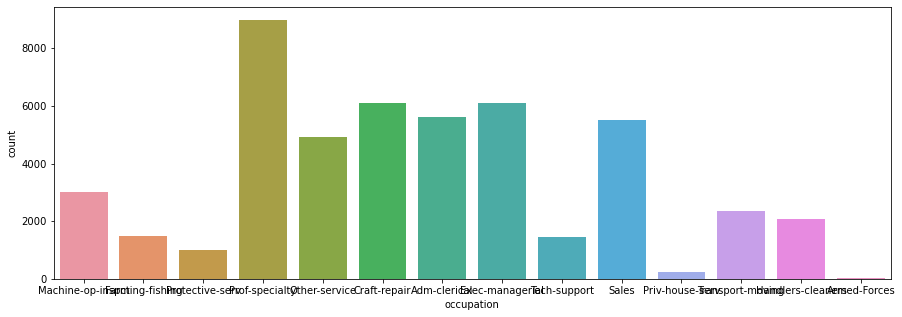

In [39]:
plt.figure(figsize=(15,5))
sns.countplot(df['occupation'])
print(df['occupation'].unique())

Prof-speciality has maximum count and armed forces has minimum count

<AxesSubplot:xlabel='relationship', ylabel='count'>

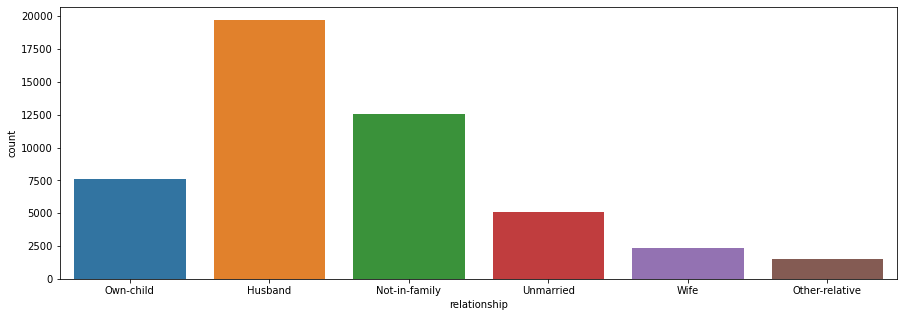

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(df['relationship'])


Husband has maximum count

<AxesSubplot:xlabel='race', ylabel='count'>

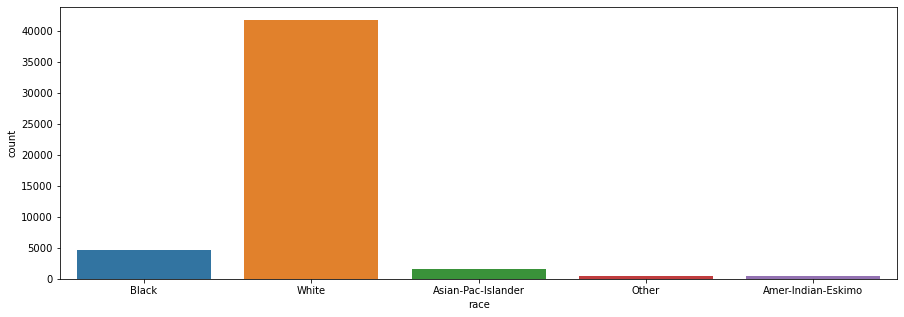

In [41]:
plt.figure(figsize=(15,5))
sns.countplot(df['race'])


White race is maximum among all

<AxesSubplot:xlabel='gender', ylabel='count'>

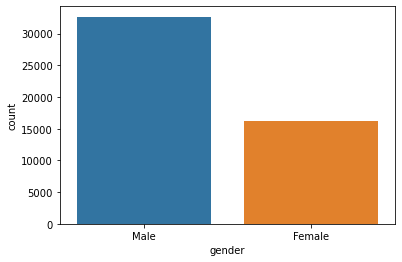

In [42]:

sns.countplot(df['gender'])


There are more male compared to female

<AxesSubplot:xlabel='native-country', ylabel='count'>

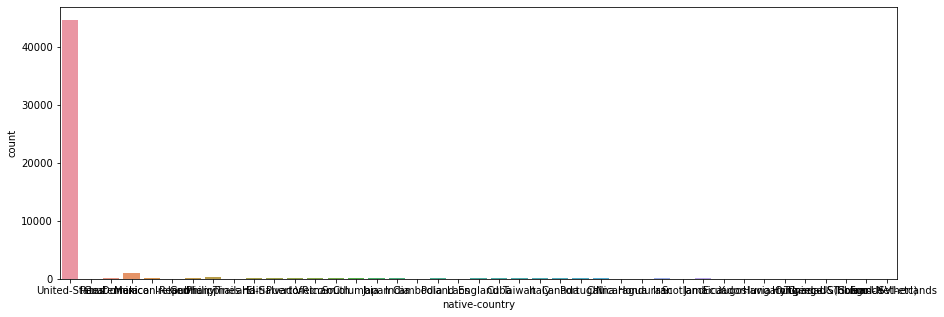

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(df['native-country'])


Looks like United States has maximum count

<AxesSubplot:xlabel='income', ylabel='count'>

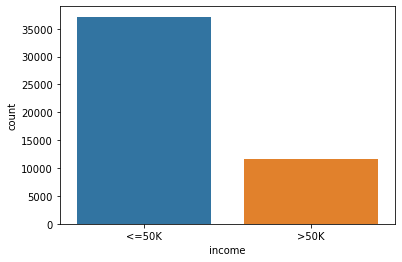

In [44]:
sns.countplot(df['income'])

Looks like we have an imbalanced data set as the income with <= 50k is more compared to >50k

### Bivariant Analysis

Let us check the relation between age and income

Text(0.5, 1.0, 'Box plot of income and age')

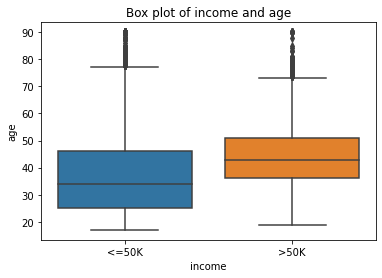

In [45]:
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of income and age')

Income <=50k has lower median when compared to >50k.

#### Workclass relation with income

Text(0.5, 1.0, 'Relation between Workclass and income')

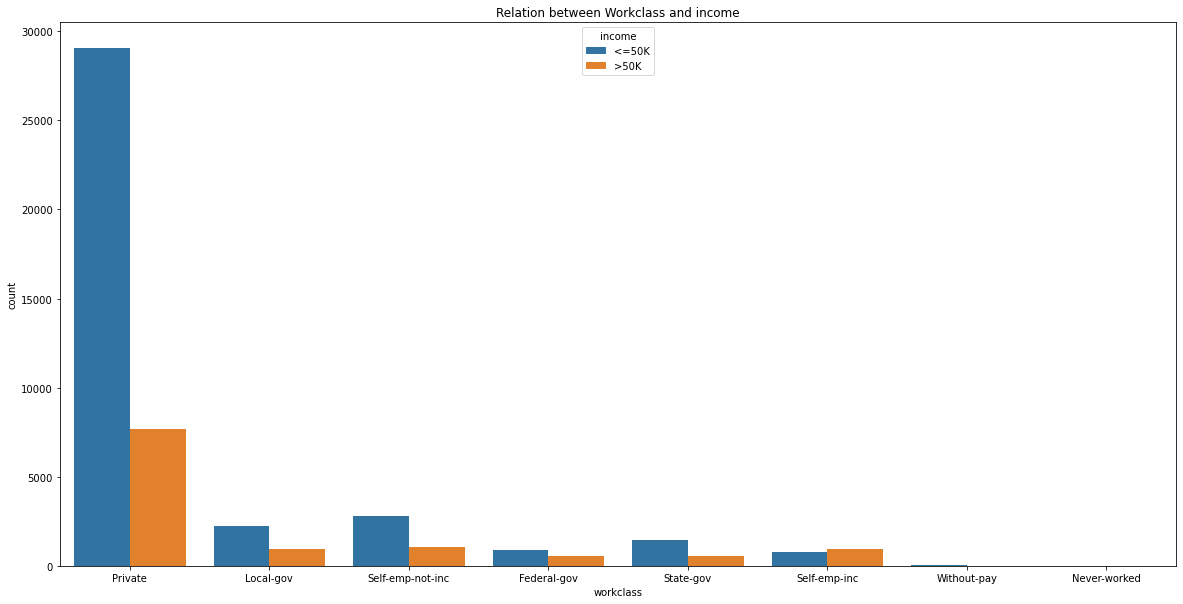

In [46]:
fig = plt.figure(figsize=(20,10))
sns.countplot(x='workclass',hue='income',data=df).set_title('Relation between Workclass and income')

The data is more in private when compared to other and in almost the workclasses income is <=50k is more prevalent.

#### capital-loss and capital-gain with income

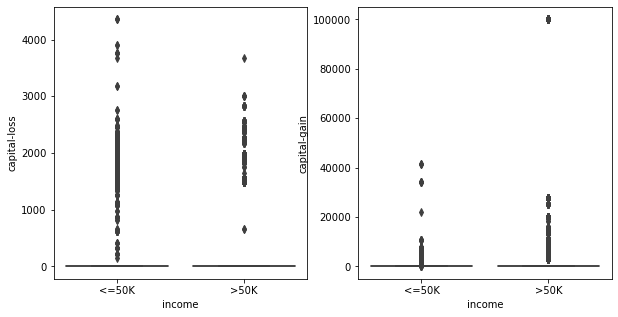

In [47]:
fig, ax = plt.subplots(1, 2)
sns.boxplot(y='capital-loss',x='income',data=df,ax=ax[0])
sns.boxplot(y='capital-gain',x='income',data=df,ax=ax[1])
fig.set_figheight(5)
fig.set_figwidth(10)

Most of the values are concentrated for <=50k income

#### Relationship vs Income

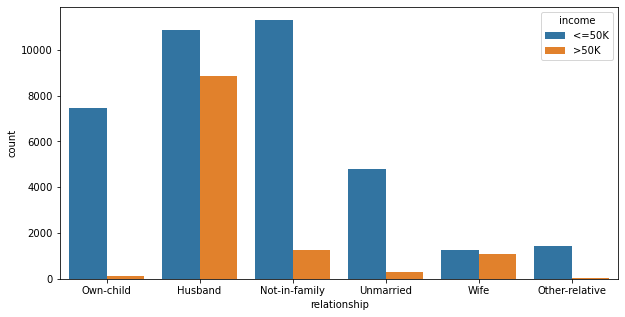

In [48]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="relationship", hue="income",
            data=df);

A person with husband as a relation in the family has the highest count in both <=50k and >50k and Not-in-family relation is highest with <=50k income

#### Race vs Income


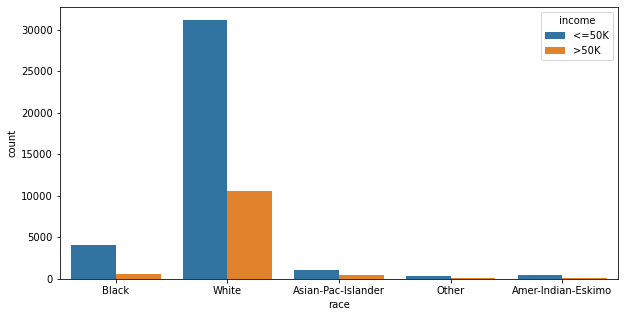

In [49]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="race", hue="income",
            data=df);

Data is more concentrated around White race and has highest count for both the incomes. This is common because most of the people in the dataset are white

#### Gender Vs Income

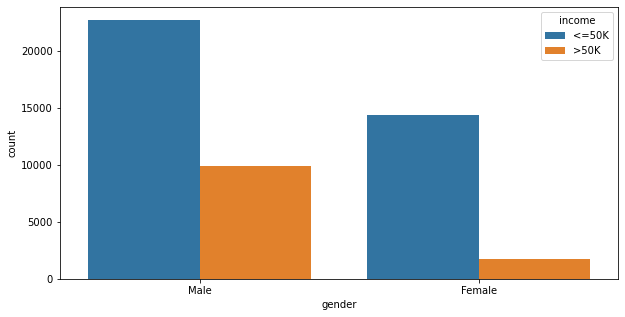

In [50]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x="gender", hue="income",
            data=df);

Male is dominating in both the classes compared to Female

#### Education Vs Income


<Figure size 1440x720 with 0 Axes>

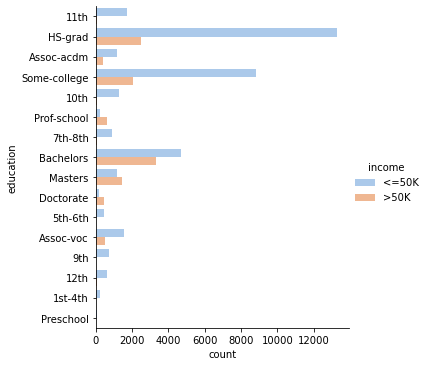

In [51]:
fig = plt.figure(figsize=(20,10))
sns.catplot(y="education", hue="income", kind="count",
            palette="pastel",
            data=df);

HS-grad is the most common education with <=50k income

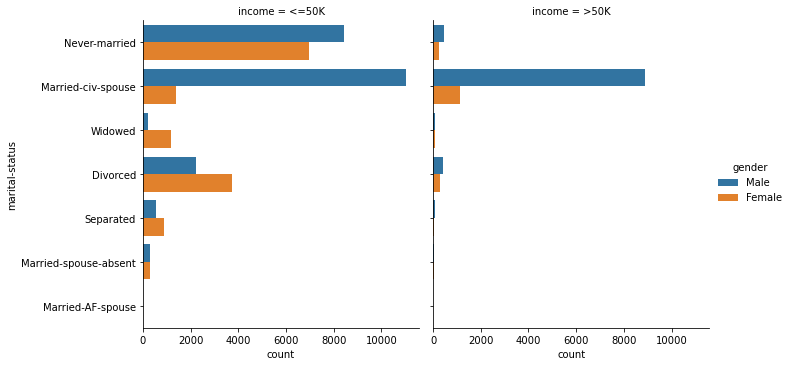

In [52]:
sns.catplot(y='marital-status',hue='gender',col='income',data=df,kind='count')

People with marital status as Married-civ-spouce has highest people with income more then 50k.

#### Occupation Vs Income

<AxesSubplot:xlabel='count', ylabel='occupation'>

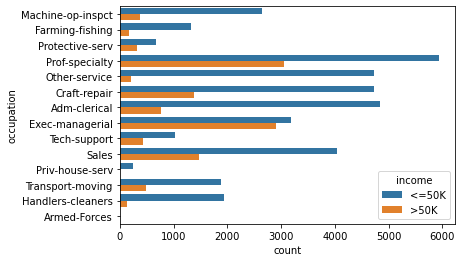

In [53]:
sns.countplot(y="occupation", hue="income",
            data=df)

Prof-speciality is leading in case of both <=50k and >50k income

Let us see the pairplot

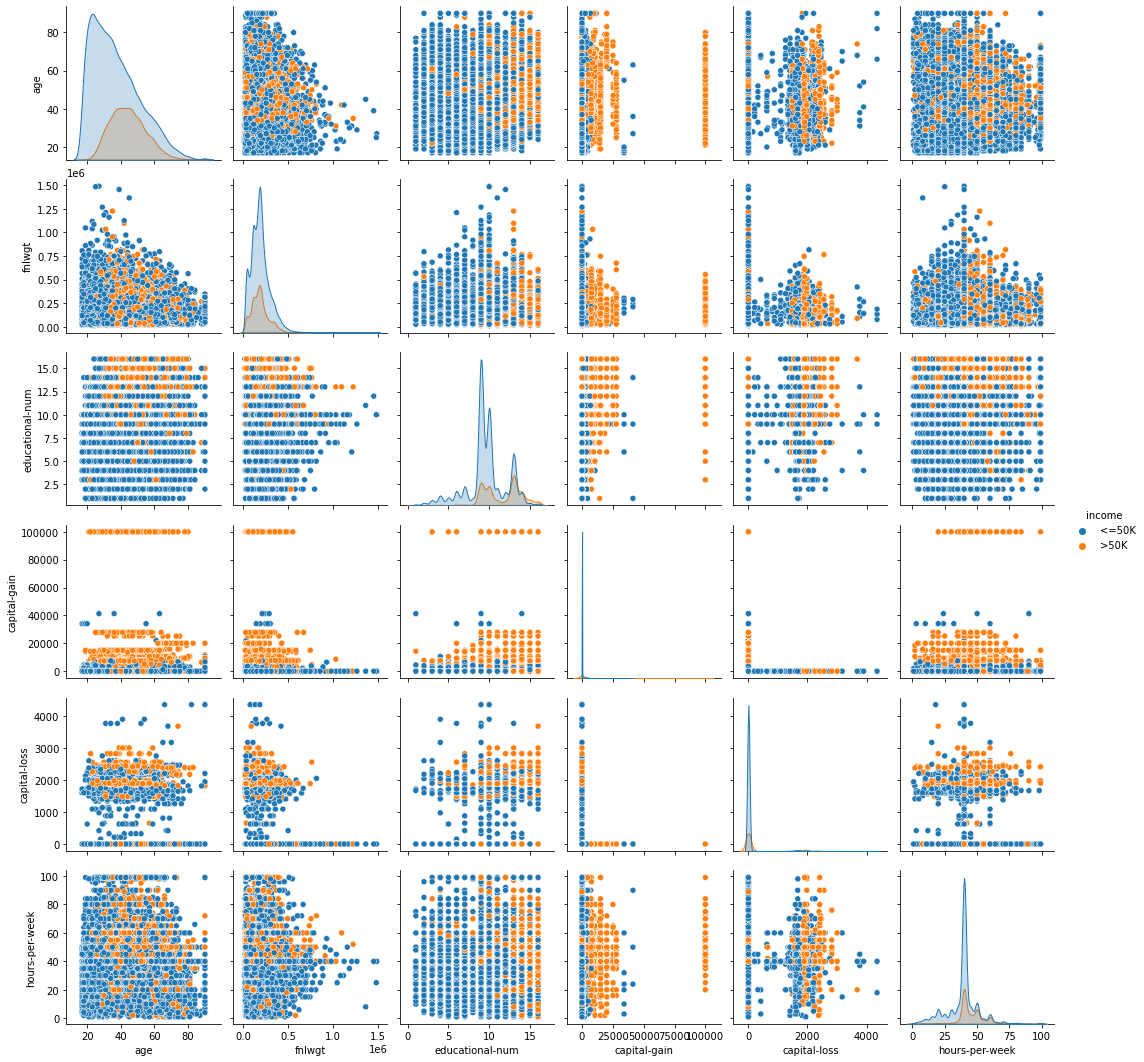

In [365]:
sns.pairplot(df,hue="income")

Looks like we cannot get any information from the pairplot

<AxesSubplot:>

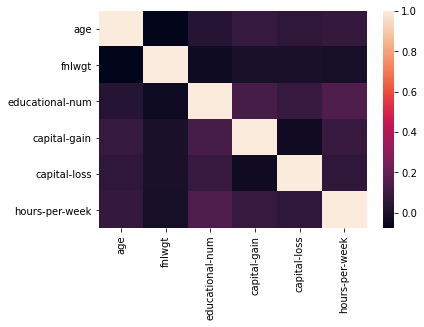

In [320]:
sns.heatmap(df.corr())


There is no correlation with more than 0.5

### Outliers
we have outliers especially in 3 columns. Let us handle that here

In [54]:
from scipy import stats
import matplotlib.pyplot as plt
df_copy=df.copy()
fitted_data, fitted_lambda = stats.boxcox(df_copy['age'])


Lambda value used for Transformation: 0.17478286528476536


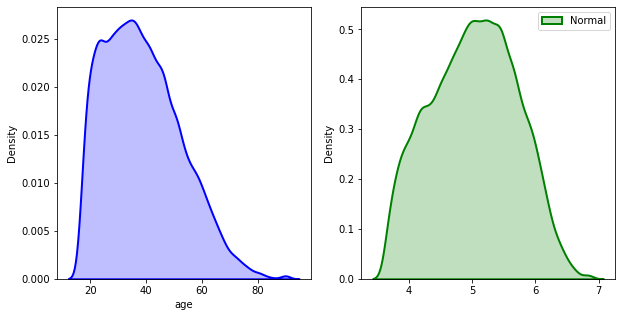

In [55]:
fig, ax = plt.subplots(1, 2)
  
sns.distplot(df_copy['age'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="blue", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
  
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [56]:
df_copy['age'] = fitted_data

In [57]:
df_copy['fnlwgt']=df_copy['fnlwgt'].clip(lower=df_copy['fnlwgt'].quantile(0.05), upper=df_copy['fnlwgt'].quantile(0.95))

In [58]:
df_copy['educational-num']=df_copy['educational-num'].clip(lower=df_copy['educational-num'].quantile(0.05), upper=df_copy['educational-num'].quantile(0.95))

Let us check the boxplots now

<AxesSubplot:xlabel='age'>

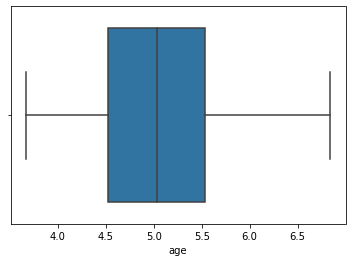

In [59]:
sns.boxplot(df_copy['age'])

<AxesSubplot:xlabel='fnlwgt'>

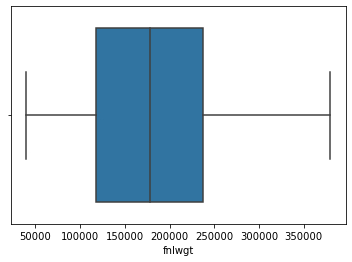

In [60]:
sns.boxplot(df_copy['fnlwgt'])

<AxesSubplot:xlabel='educational-num'>

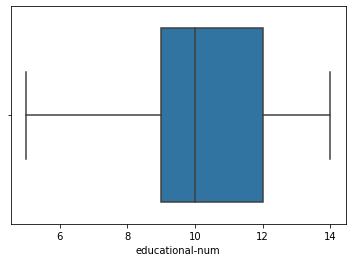

In [61]:
sns.boxplot(df_copy['educational-num'])

### Conclusions

1. Median age of the people is 37 and age is right skewed. Range of age is 17-90
2. 30-40 hours per week is most common. There are also people who work for 80-100 and also less than 20 which is unusual
3. Final weight of how much of the population it represents fnlwgt is also right skewed
4. capital-loss values are centered on 0 and only few are non zero(2282). This attribute is similar to the capital-gain i.e. most of the values are centered on 0
	1. Both capital-gain and capital-loss can be zero
	2. If capital-gain is Zero then capital-loss being high or above zero.
	3. If capital-loss is Zero then capital-gain being high or above zero 
Most of the values are concentrated for <=50k income
5. Maximum people are from Private sector
6. Highes t number of people are from education background as HS-grad,Some college and Bachelors
7. Married-civ-spouse has maximum number of observations followed by Never-married. Married-AF-spouse has minimum number of observations.
8. Top 5 occupations are Prof-speciality,Craft-repair,Exec-managerial,Adm-clerical,Sales. Armed forces being the least
9. In relationship column, Husband has maximum percentage count
10. Among all the races, white is dominating.
11. There are more male compaed to female
12. Most of the people are from United States
13. The data is more in private when compared to other and in almost the workclasses income is <=50k is more prevalent.
14. A person with husband as a relation in the family has the highest count in both <=50k and >50k and Not-in-family relation is highest with <=50k income
15. Data is more concentrated around White race and has highest count for both the incomes. This is common because most of the people in the dataset are white
16. Male is dominating in both the classes compared to Female
17. HS-grad is the most common education with <=50k income
18. People with marital status as Married-civ-spouce has highest people with income more then 50k.
19. Prof-speciality is leading in case of both <=50k and >50k income 

### Feature Transformation

In [62]:
from sklearn.preprocessing import StandardScaler


In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in cat_cols:
    df_copy[i] = labelencoder.fit_transform(df_copy[i])

In [64]:
scale = StandardScaler()
X=df_copy.drop('income',axis=1)
Y=df_copy['income']
X.shape

(48842, 14)

In [65]:
X= scale.fit_transform(X)

In [66]:
X

array([[-1.02833234, -0.08972675,  0.45073233, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       [ 0.09938001, -0.08972675, -1.05031118, ..., -0.2171271 ,
         0.77292975,  0.25969378],
       [-0.73120381, -1.8902337 ,  1.65768799, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       ...,
       [ 1.32518243, -0.08972675, -0.36989539, ..., -0.2171271 ,
        -0.03408696,  0.25969378],
       [-1.35650146, -0.08972675,  0.17337655, ..., -0.2171271 ,
        -1.64812038,  0.25969378],
       [ 0.99990112,  0.81052673,  1.12050841, ..., -0.2171271 ,
        -0.03408696,  0.25969378]])

In [67]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

In [68]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [69]:
#K value
accuracy_list = []
error_list = []
for i in range(1,31):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    accuracy_list.append(accuracy)
    error_list.append(1-accuracy)

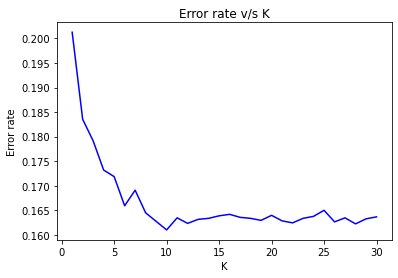

In [70]:
plt.plot(list(range(1,31)),error_list,c= 'b')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [71]:
#model training  # selecting k =9 as per error graph
model = KNeighborsClassifier(n_neighbors=9) 
model.fit(X_train,y_train)
#model testing
y_pred = model.predict(X_test)

In [72]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[6776,  644],
       [ 946, 1403]], dtype=int64)

In [80]:
#accuracy
accuracy_score(y_test,y_pred)

0.8372402497696796

In [81]:
from sklearn.decomposition import PCA
pca = PCA(.95)
pca.fit_transform(X)

array([[-1.78891729,  2.33659831, -0.38935714, ...,  0.49627313,
        -0.12888732, -0.70734653],
       [ 1.23410001,  0.36843484,  0.30370913, ...,  0.31061924,
        -0.24636015,  0.35439914],
       [ 0.53042278,  0.49848125, -1.5277555 , ...,  0.20983327,
        -0.19371501, -1.09002495],
       ...,
       [-1.88623651, -0.60469305,  1.08330886, ..., -0.29552248,
         2.41875963,  0.91414048],
       [-1.72503671,  0.21220115, -0.70875394, ..., -1.17688482,
        -0.73857103, -0.27489917],
       [-1.08746833, -0.8596682 ,  1.59022187, ...,  0.17245215,
         0.29503923,  0.75048041]])

In [82]:
pca.get_covariance()


array([[ 1.00002047e+00,  4.23378244e-02, -7.57385947e-02,
         1.74669715e-03,  7.22697193e-02, -3.13623362e-01,
        -1.10542579e-02, -2.83329103e-01,  2.24734797e-02,
         1.02250396e-01,  8.08709140e-02,  6.15313649e-02,
         1.32030595e-01, -5.81685292e-03],
       [ 4.23378244e-02,  1.00002047e+00, -2.83791355e-02,
         5.21873915e-03,  3.37918009e-04, -2.08699763e-02,
         9.84164866e-03, -5.60737350e-02,  5.39241269e-02,
         6.66734612e-02,  3.15584924e-02,  4.16811448e-03,
         4.28462892e-02, -4.82874628e-03],
       [-7.57385947e-02, -2.83791355e-02,  1.00002047e+00,
        -2.08024122e-02, -3.35484199e-02,  2.98109271e-02,
        -2.12929655e-03,  7.11988978e-03, -1.84269734e-02,
         2.89205360e-02, -3.23190087e-03, -1.87297830e-03,
        -1.30963397e-02, -6.20483348e-02],
       [ 1.74669715e-03,  5.21873915e-03, -2.08024122e-02,
         1.00002047e+00,  3.53707708e-01, -3.74175514e-02,
        -3.51263970e-02, -1.07580529e-02,  1.

In [83]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.15050283, 0.10055125, 0.0809727 , 0.07972084, 0.07429356,
       0.07284299, 0.07025312, 0.06764309, 0.06517328, 0.0607045 ,
       0.05874115, 0.0481547 , 0.04303868])

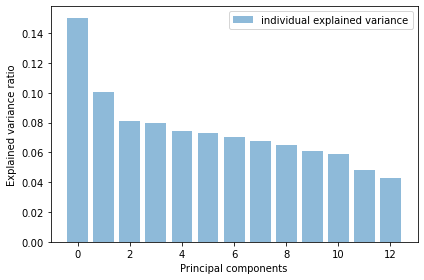

In [84]:
plt.figure(figsize=(6, 4))
plt.bar(range(13), explained_variance, alpha=0.5, align='center',label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()


Let us drop the components which have variance less than 5%

In [85]:
pca=PCA(n_components=10)
X_new=pca.fit_transform(X)
X_new

array([[-1.78891729,  2.33659831, -0.38935714, ..., -0.38908402,
         1.09507675, -1.7285299 ],
       [ 1.23410001,  0.36843484,  0.30370913, ..., -1.02587919,
         0.37471223,  0.21818033],
       [ 0.53042278,  0.49848125, -1.5277555 , ...,  0.92420341,
        -0.47964475,  0.09589521],
       ...,
       [-1.88623651, -0.60469305,  1.08330886, ..., -0.16145366,
         0.81406235,  0.2672085 ],
       [-1.72503671,  0.21220115, -0.70875394, ..., -0.36869181,
         0.58240862,  0.35752833],
       [-1.08746833, -0.8596682 ,  1.59022187, ...,  2.29166426,
         0.19870166, -0.40727185]])

In [86]:
#test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,Y,test_size=0.20,random_state=0)

### KNN

In [87]:
#model training  # selecting k =9 as per error graph
model = KNeighborsClassifier(n_neighbors=9) 
model.fit(X_train,y_train)
#model testing
y_pred = model.predict(X_test)

In [88]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[6740,  680],
       [ 987, 1362]], dtype=int64)

In [89]:
#accuracy
accuracy_score(y_test,y_pred)

0.8293581738151294

#### KNN with GridsearchCV

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
metric_K = ["euclidean","manhattan"]
param_grid = dict(n_neighbors = k_range, weights = weight_options, metric = metric_K)

In [92]:
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10 ,verbose = 1, n_jobs = -1)
grid.fit(X_new,Y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed: 16.0min finished


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [93]:
print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.8383768024095557
{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}
KNeighborsClassifier(metric='euclidean', n_neighbors=23)


In [94]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
ypredict = knn.predict(X_test)

In [95]:
acc = accuracy_score(y_test,ypredict)
acc

0.8195311700276384

### Logistic Regression

In [463]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [464]:
y_pred = model.predict(X_test)

In [465]:
accuracy_score(y_test,y_pred)

0.8191217115364929

#### Decision Tree

In [466]:
from sklearn.tree import DecisionTreeClassifier
modelClassifier = DecisionTreeClassifier(criterion='gini',random_state=0)
modelClassifier.fit(X_train,y_train)
y_pred = modelClassifier.predict(X_test)

In [467]:
accuracy_score(y_test,y_pred)

0.7817586242194697

#### Random Forest

In [470]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8390828129798341

In [475]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : randint(5, 9),
    'max_features':randint(1, 5),
    'min_samples_leaf':randint(1, 9),
    'n_estimators':randint(100,250)
}
#### initial model
model = RandomForestClassifier()

random_search = RandomizedSearchCV(model,param_distributions = params,cv = 5)

In [476]:
random_search.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E491BDDC0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E49D941C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E4A45C370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000026E4A45C670>})

In [477]:
best_random = random_search.best_estimator_

In [478]:
y_pred = best_random.predict(X_test)
accuracy_score(y_test,y_pred)

0.8298699969290613

#### Gradient boosting

In [468]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [469]:
accuracy_score(y_test,y_pred)

0.8224997440884431

#### XG Boost

In [471]:
!pip install xgboost

In [472]:
import xgboost as xgb
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)

[21:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [473]:
y_pred = clf.predict(X_test)


In [474]:
accuracy_score(y_test,y_pred)

0.8389804483570478

### Summary

|Model|Accuracy|
|----|----|
|KNN|82.9|
|KNN with GridSerachCV|81.9|
|Logistics Regression|81.9|
|Decision Tree|78.1|
|Random Forest|83.9|
|Random Forest with RandomizedSearchCV|82.9|
|Gradient boosting|82.2|
|XG Boost|83.8|